In [48]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [49]:
cancer = pd.read_csv('/content/breast cancer classification dataset.csv')
cancer.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,NaN,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,NaN,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [50]:
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  9
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      8
Unnamed:

In [52]:
# Null values deal
print("Shape of dataset before droppping:",cancer.shape)

from sklearn.impute import SimpleImputer                                             # impute

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(cancer[['radius_mean']])

cancer['radius_mean'] = impute.transform(cancer[['radius_mean']])

                                                                                     # row Drop
cancer= cancer.dropna(axis=0,subset=['fractal_dimension_worst'])
#cancer = cancer.loc[:, ~cancer.columns.str.contains('^Unnamed')]                     # Unnamed column drop
cancer= cancer.dropna(axis=1)

print("Shape after dropping: ", cancer.shape)

Shape of dataset before droppping: (561, 32)
Shape after dropping:  (561, 32)


In [53]:
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [54]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder                                       #Label encoding
enc = LabelEncoder()                                                                            
cancer.iloc[:,1] = enc.fit_transform(cancer.iloc[:,1].values)

In [55]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,14.091502,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,84300903,1,19.690000,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.420000,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.290000,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.450000,15.70,82.57,477.1,0.1278,0.1700,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [41]:
#Split dataframe into X and Y
X = cancer.iloc[:,2:31].values                         #Features

Y = cancer.iloc[:,1].values                            #Cancer y/n?

In [44]:
# train-test split = 80:20
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state=0)

In [56]:
#Scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [83]:
# Function
def models(X_train, Y_train):

  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
  tree.fit(X_train, Y_train)

  print('[0]Logisitic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))

  return log, tree

In [61]:
# Getting the models
model = models(X_train, Y_train)

[0]Logisitic Regression Training Accuracy: 0.9933035714285714
[1]Decision Tree Classifier Training Accuracy: 1.0


In [87]:
# Test data accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):

  if (i==0):
    print('Logistic Regression Model: ')
  else:
    print('Decision Tree Classifier Model: ')

  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Logistic Regression Model: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        70
           1       0.93      0.93      0.93        43

    accuracy                           0.95       113
   macro avg       0.94      0.94      0.94       113
weighted avg       0.95      0.95      0.95       113

0.9469026548672567

Decision Tree Classifier Model: 
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        70
           1       0.88      0.86      0.87        43

    accuracy                           0.90       113
   macro avg       0.90      0.89      0.90       113
weighted avg       0.90      0.90      0.90       113

0.9026548672566371



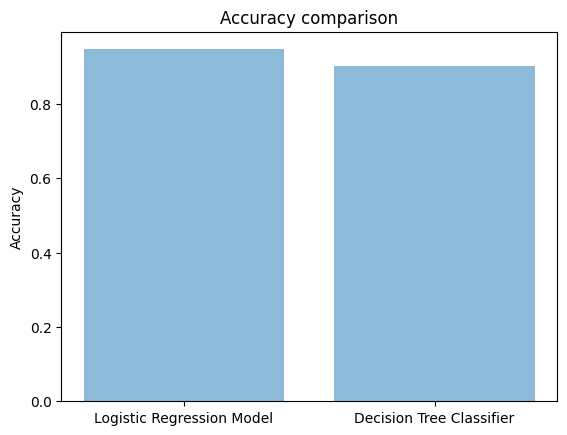

In [92]:
#Data Visualization
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Logistic Regression Model', 'Decision Tree Classifier')
y_pos = np.arange(len(objects))
a= accuracy_score(Y_test, model[0].predict(X_test))
b= accuracy_score(Y_test, model[1].predict(X_test))
performance = [a,b]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Accuracy comparison')

plt.show()